In [ ]:
#

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split 
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


 # 1. Data Set $ - # Breast Cancer Wisconsin (Diagnostic) $

In [198]:
# Load dataset and make a data frame
cancer = load_breast_cancer()

cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target)

#diagnosis = pd.Categorical.from_codes(cancer.target, cancer.target_names)
#diagnosis = pd.get_dummies(diagnosis)
cancerpd.shape, target.shape

((569, 30), (569, 1))

In [199]:
# Scaling the features
def ScaleX (x):
    scalar = MinMaxScaler().fit(x)
    x_scaled=scalar.transform(x)    
    return x_scaled

X_scaled = ScaleX(cancer.data)
# scaled df
data=pd.DataFrame(X_scaled, columns=cancer.feature_names)


# 2. Data Visualization 

In [11]:
cancerpd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
cancerpd.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
cancerpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [76]:
target.columns = ['diagnosis']
target.sample(5)

,diagnosis
414,0
514,0
482,1
34,0
505,1


In [36]:
cancerpd.groupby(target['diagnosis']).mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [35]:
B, M = target['diagnosis'].value_counts()  #target.diagnosis.value_counts()
print("Benign(1)   ", B, "\nMalignant(0)", M)

Benign(1)    357 
Malignant(0) 212


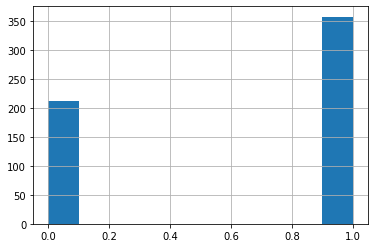

In [30]:
target.diagnosis.hist()

###  Features characteristic for Benign and Malignant 

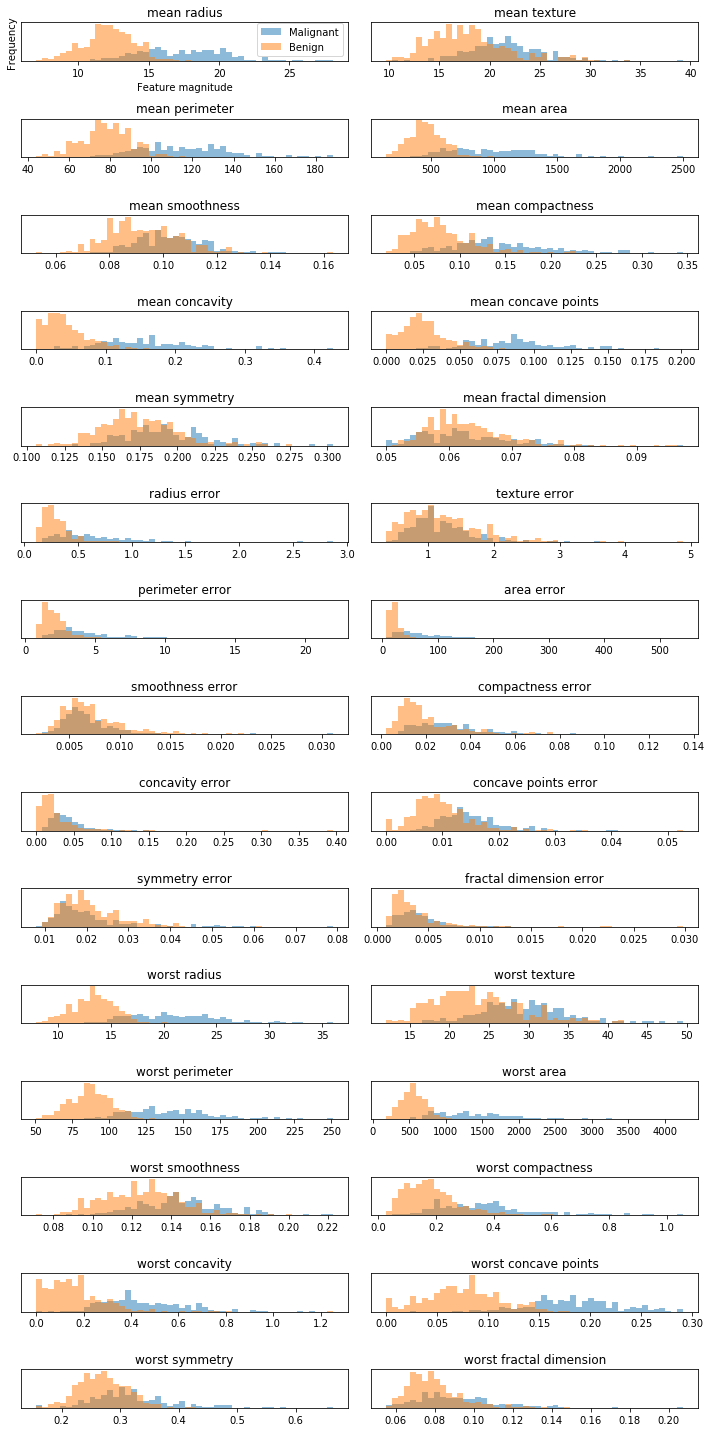

In [70]:
# Features characteristic for Benign and Malignant
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins =50)
    ax[i].hist(malignant[:,i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc ="best")
fig.tight_layout()
plt.show()

# 3. Features Selection

In [ ]:
'''############ 3. Feature Selection ############'''

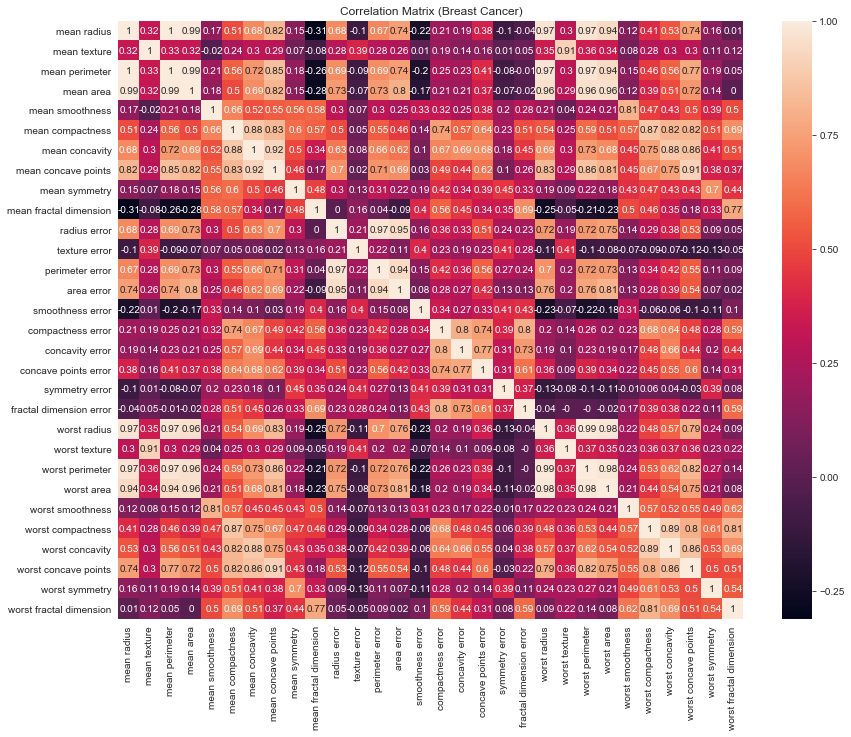

In [165]:
# Plot the correlation matrix
corr_matrix = cancerpd.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(data=corr_matrix, annot=True)

plt.title("Correlation Matrix (Breast Cancer)")
plt.show()


## Removing Highly Correlated Features
Correlation between the output observations and the input features is very important and such features should be retained. However, if two or more than two features are mutually correlated, they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.


In [43]:
# remove correlated features with corr >= 0.9, by keeping one of them
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [44]:
selected_features = cancerpd.columns[columns]
selected_features.shape, selected_features

((20,),
 Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
        'mean concavity', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'smoothness error',
        'compactness error', 'concavity error', 'concave points error',
        'symmetry error', 'fractal dimension error', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst symmetry',
        'worst fractal dimension'],
       dtype='object'))

In [50]:
# The features are now reduced to 20
selected_data20 = cancerpd[selected_features]
selected_data20.shape #head()

(569, 20)

In [ ]:
# let's check again if the selected features are clean

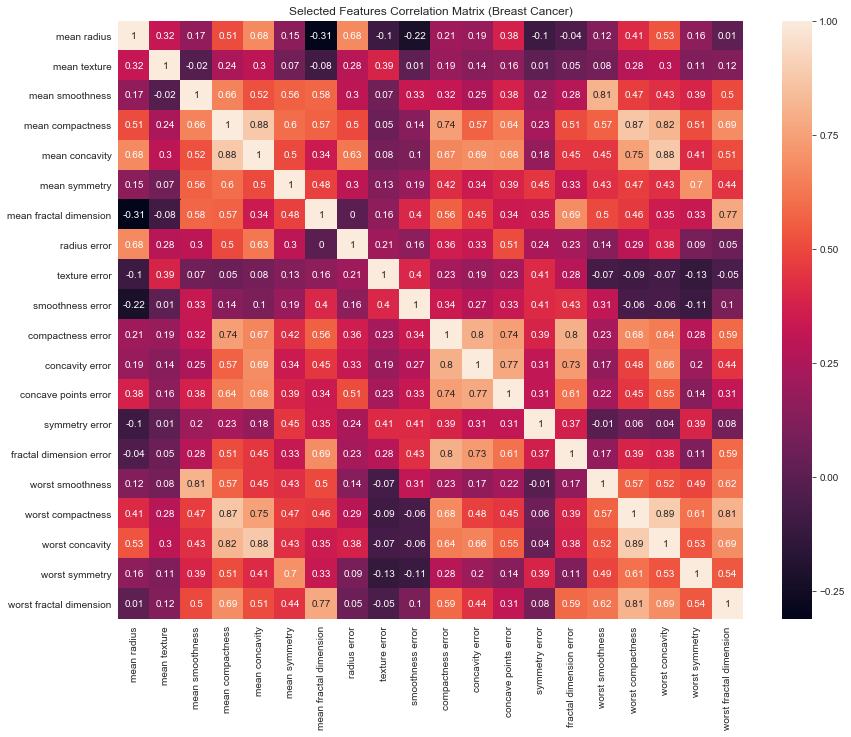

In [164]:
# correlation map for selected features, all with corr. less than 0.9
f,ax = plt.subplots(figsize=(14, 11))
sns.heatmap(data=selected_data20.corr().round(2), annot=True)

plt.title("Selected Features Correlation Matrix (Breast Cancer)")
plt.show()

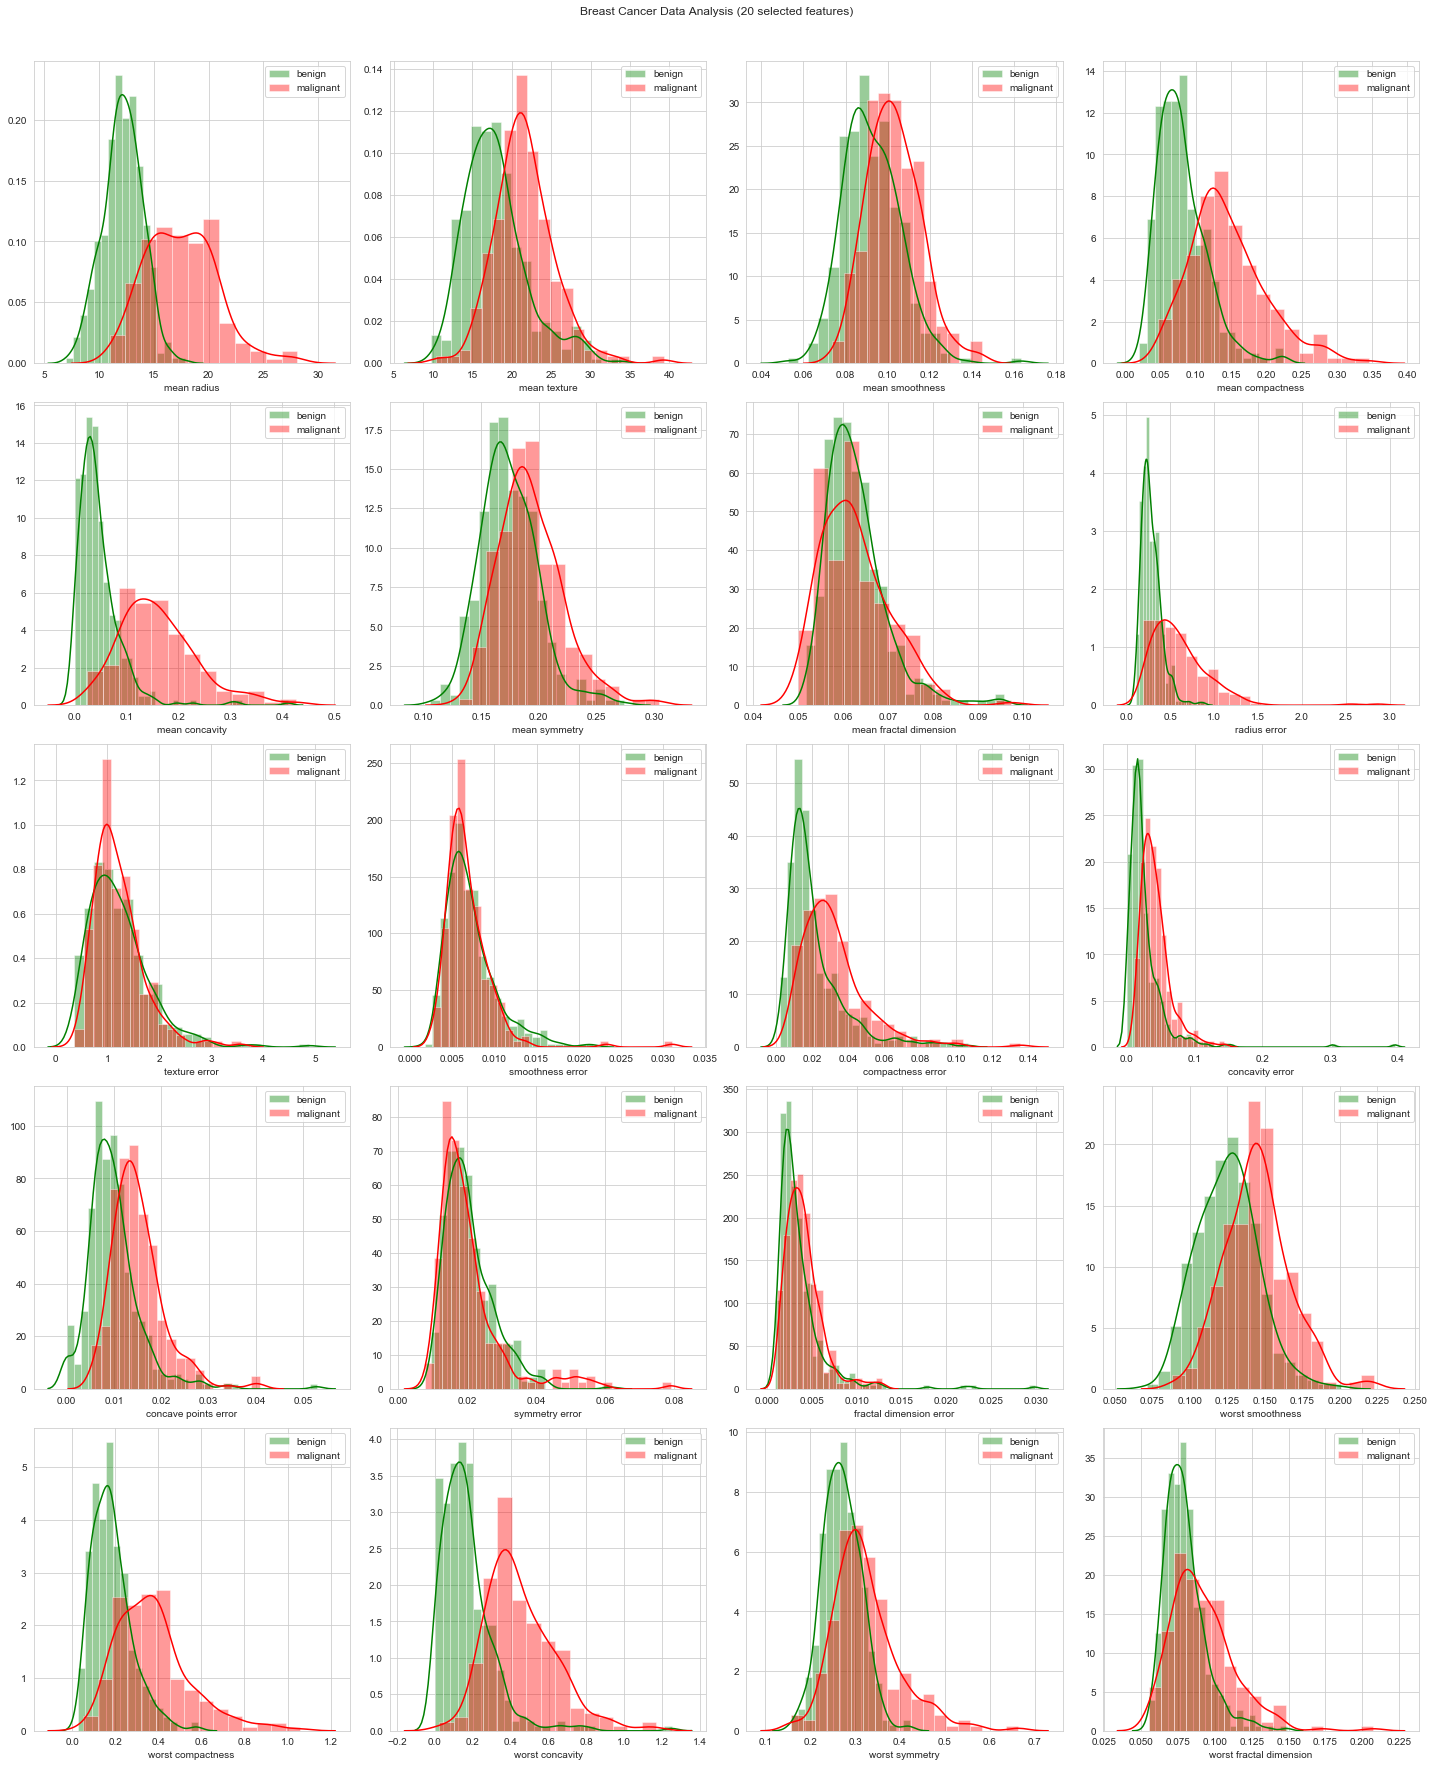

In [166]:
# Let's look at the 20 selected features characteristic 
fig = plt.figure(figsize = (20, 25))
j = 0
for i in selected_features:
    plt.subplot(5, 4, j+1)
    j += 1
    sns.distplot(selected_data20[i][cancer.target==1], color='g', label = 'benign')
    sns.distplot(selected_data20[i][cancer.target==0], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cancer Data Analysis (20 selected features)')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
# From the above graphs, we can see that some of the features are still overlaping(mean) and 
# require further investigations 

Accuracy is:  0.9649122807017544


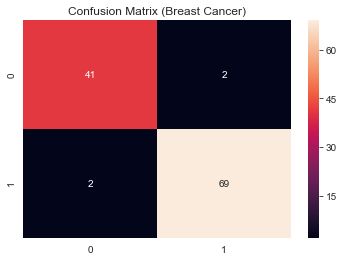

In [167]:
# Confusion Matrix

# split the data into train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(selected_data20, cancer.target, test_size=0.2, random_state=42)

# Scaling
#x_train, x_test = ScaleX(x_train), ScaleX(x_test)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(n_estimators=100,random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix (Breast Cancer)")
plt.show()

In [ ]:
# Eventhough the accurasy looks good for the 20 selected featires, we need to reduce further 

## Univariate feature selection and random forest classification

Select features according to the -k- highest scores

In [179]:
## Find the best scored 10 features
from sklearn.feature_selection import SelectKBest, chi2

select_feature = SelectKBest(chi2, k=8).fit(x_train, y_train)

#print('Score list:\n', select_feature.scores_) #.pvalues_
print('Feature list:\n', x_train.columns[select_feature.get_support()])


Feature list:
 Index(['mean radius', 'mean texture', 'mean compactness', 'mean concavity',
       'radius error', 'worst compactness', 'worst concavity',
       'worst symmetry'],
      dtype='object')


## Recursive feature elimination with cross validation and random forest classification
 
 Computes how many best features do we need for best accuracy


Optimal number of features : 12
Best features : Index(['mean radius', 'mean texture', 'mean compactness', 'mean concavity',
       'mean fractal dimension', 'radius error', 'concavity error',
       'fractal dimension error', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst symmetry'],
      dtype='object')


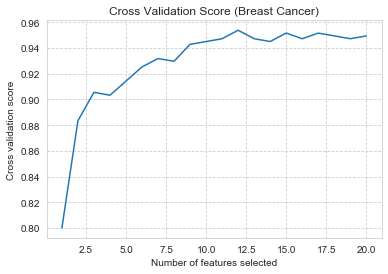

In [169]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier(n_estimators=50)#,random_state=42)
rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
plt.figure()
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Cross Validation Score (Breast Cancer)")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
ax = plt.gca()
ax.grid(linestyle='--')
plt.show()

In [9]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier() #n_estimators=50) #,random_state=42) 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, np.asanyarray(y_train).ravel())

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

Optimal number of features : 8
Best features : Index(['mean radius', 'mean texture', 'mean concavity', 'radius error',
       'concavity error', 'worst smoothness', 'worst compactness',
       'worst concavity'],
      dtype='object')


C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Optimal number of features : 8

Best features : 

    Index(['mean radius', 'mean texture', 'mean concavity', 'radius error',
       'concavity error', 'worst smoothness', 'worst compactness',
       'worst concavity'],
      dtype='object')

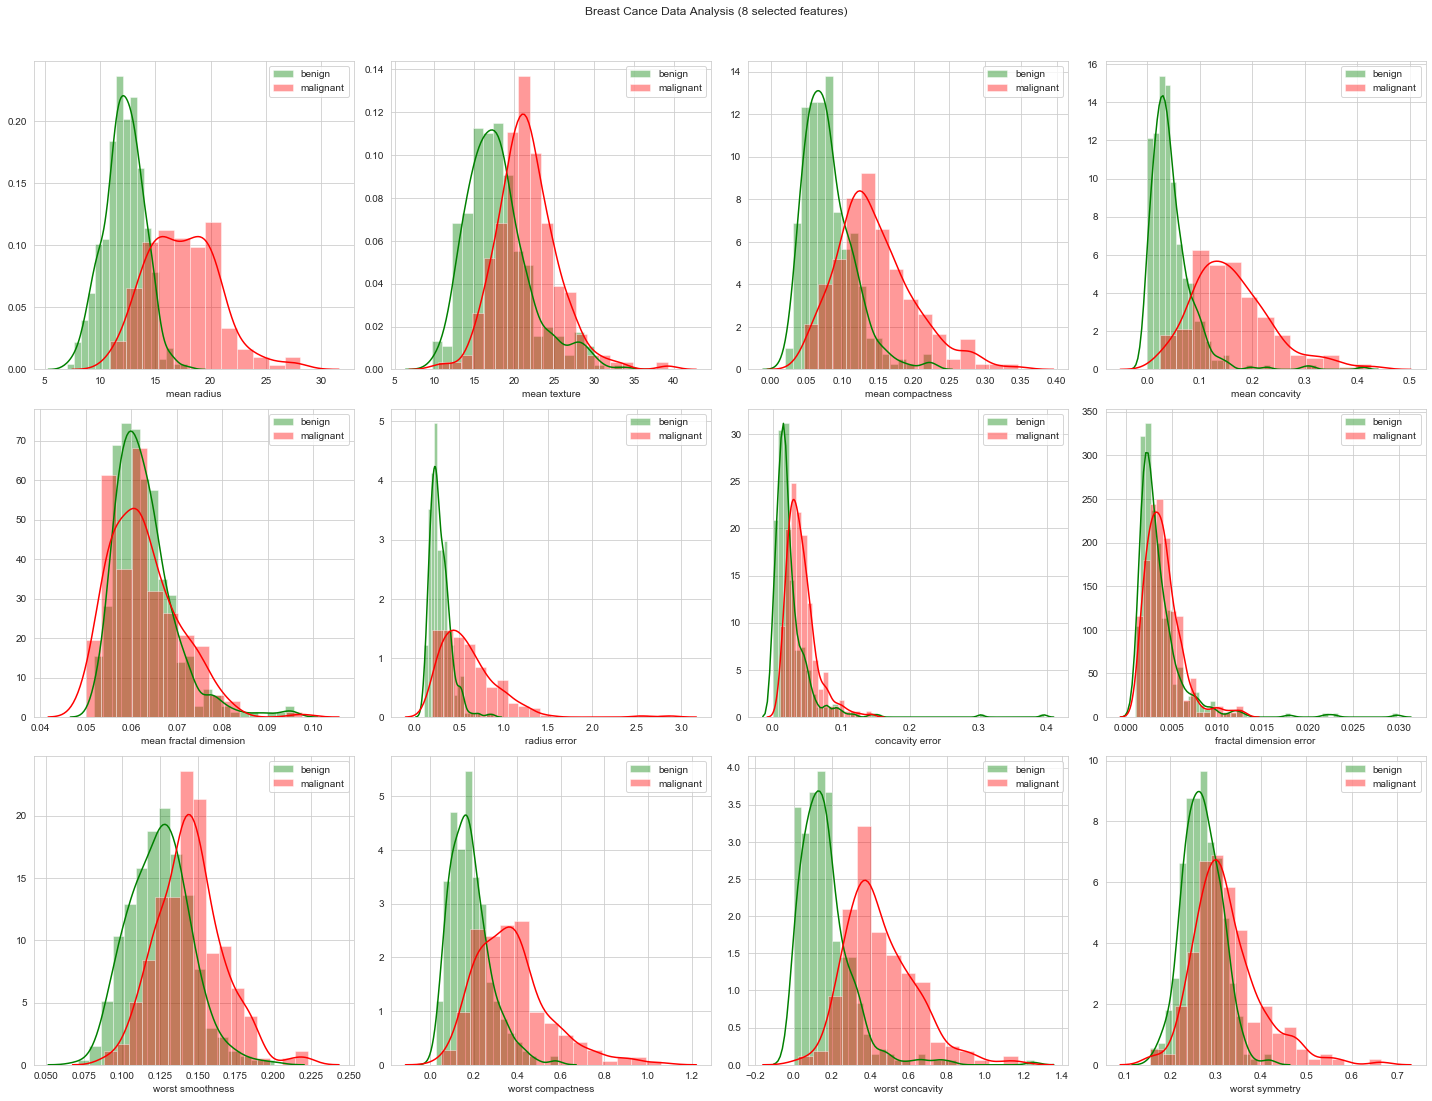

In [170]:
# Breast Cancer Data Analysis for the 8 selected features
fig = plt.figure(figsize = (20, 25))
j = 0
for i in x_train.columns[rfecv.support_]:
    plt.subplot(5, 4, j+1)
    j += 1
    sns.distplot(selected_data20[i][cancer.target==1], color='g', label = 'benign')
    sns.distplot(selected_data20[i][cancer.target==0], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis (8 selected features)')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [14]:
# Recursive feature elimination- the 8 features seleced above looks good for classification

## Tree based feature selection and random forest classification 

In [ ]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. (%f) %s " % (f + 1, importances[indices[f]], x_train.columns[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="g")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

1. (0.201422) mean radius 
2. (0.185388) worst concavity 
3. (0.118231) mean concavity 
4. (0.099825) radius error 
5. (0.074492) worst compactness 
6. (0.047643) mean texture 
7. (0.044262) mean compactness 
8. (0.034476) worst symmetry 
9. (0.024673) mean smoothness 
10. (0.024405) concavity error 
11. (0.023845) worst smoothness 
12. (0.018268) mean fractal dimension 
13. (0.018047) fractal dimension error 
14. (0.016740) compactness error 
15. (0.014583) smoothness error 
16. (0.012616) texture error 
17. (0.011612) worst fractal dimension 
18. (0.010981) symmetry error 
19. (0.010961) mean symmetry 
20. (0.007528) concave points error 


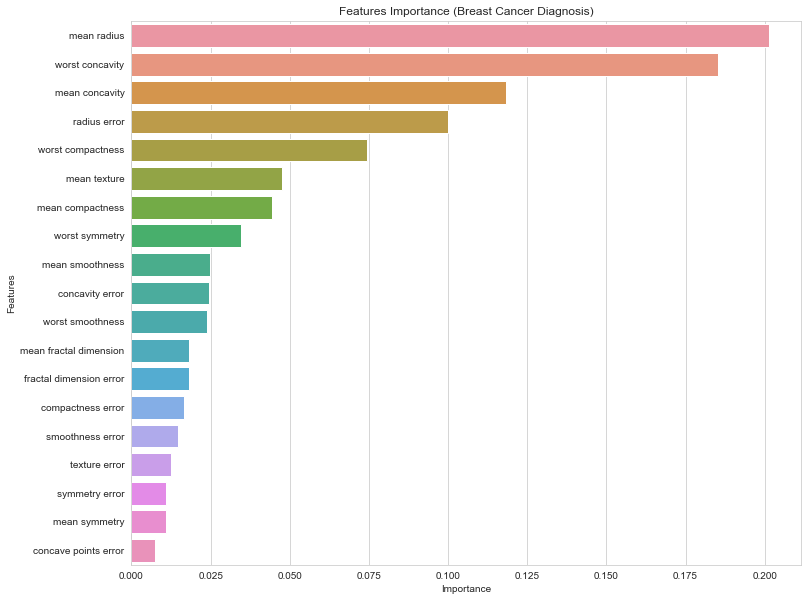

In [174]:
# Instantiate RFC with optimal parameters
RFC = RandomForestClassifier(n_estimators=50, random_state=42)
RFC.fit(x_train,y_train)

# Create dataframe by zipping RFC feature importances and column names
rfc_features = pd.DataFrame(zip(
    RFC.feature_importances_, selected_data20.columns[:-1]), columns = ['Importance', 'Features'])

indices = np.argsort(RFC.feature_importances_)[::-1]

# Sort in descending order
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

for f in range(x_train.shape[1]):
    print("%d. (%f) %s " % (f + 1, RFC.feature_importances_[indices[f]], x_train.columns[indices[f]]))

# Visualize RFC feature importances
plt.figure(1, figsize=(12, 10))
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Features Importance (Breast Cancer Diagnosis)')
sns.set_style("whitegrid")
plt.show()

#------------------------------------


In [ ]:
# Even though the values of the number pf selected values varies for different elimination methods, 
# we will choose the top 8 best features for the breast cancer diagnosis

In [180]:
# 8 is the minimum number of features we get during the different trials
selected_features8 = ['mean radius', 'mean texture', 'mean compactness', 'mean concavity', 'radius error', 
                      'worst compactness', 'worst concavity', 'worst symmetry']
selected_data8 = cancerpd[selected_features8]
selected_data8.head()

,mean radius,mean texture,mean compactness,mean concavity,radius error,worst compactness,worst concavity,worst symmetry
0,17.99,10.38,0.27760,0.3001,1.0950,0.6656,0.7119,0.4601
1,20.57,17.77,0.07864,0.0869,0.5435,0.1866,0.2416,0.2750
2,19.69,21.25,0.15990,0.1974,0.7456,0.4245,0.4504,0.3613
3,11.42,20.38,0.28390,0.2414,0.4956,0.8663,0.6869,0.6638
4,20.29,14.34,0.13280,0.1980,0.7572,0.2050,0.4000,0.2364


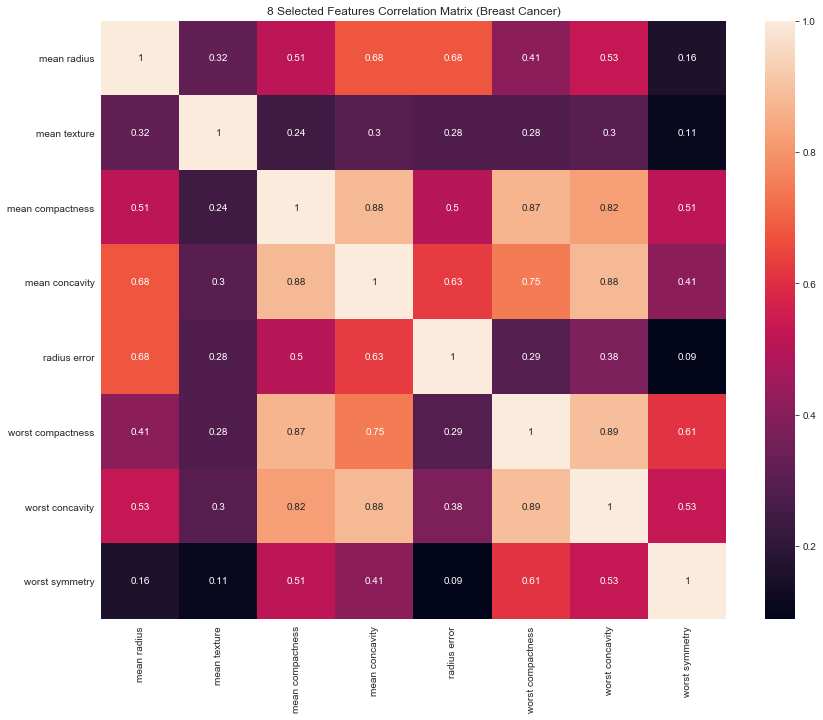

In [187]:
# correlation map for the top 8 selected features
f,ax = plt.subplots(figsize=(14, 11))
sns.heatmap(data=selected_data8.corr().round(2), annot=True)

plt.title("8 Selected Features Correlation Matrix (Breast Cancer)")
plt.show()

# 4. Feature Extraction

In [ ]:
'''############ 4. Feature Extraction ############'''

In [200]:
X = selected_data8
y = target

In [163]:
# use principle component analysis (PCA) for feature extraction


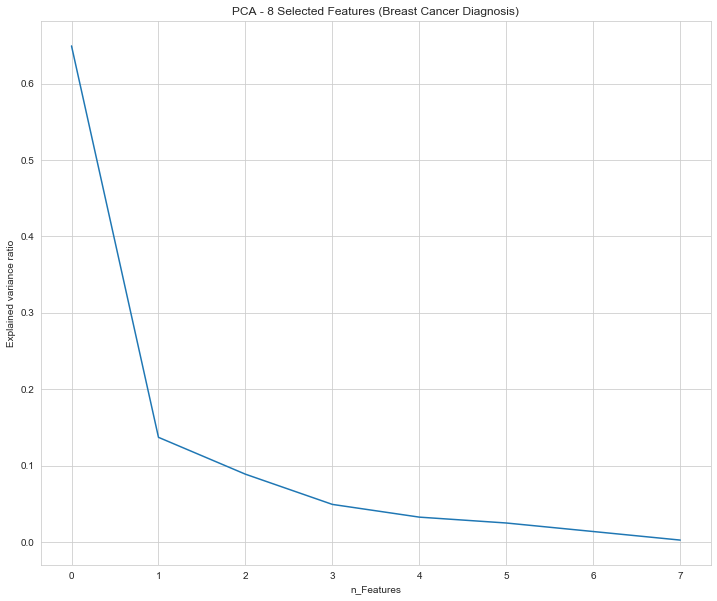

In [201]:
# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaled data /features
#scaler = MinMaxScaler().fit(x_train)
#X_train_scaled = scaler.transform(x_train)
#X_test_scaled = scaler.transform(x_test)
X_train_scaled = ScaleX(x_train)
X_test_scaled = ScaleX(x_test)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)

plt.figure(1, figsize=(12, 10))
plt.clf()
#plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_)
plt.title("PCA - 8 Selected Features (Breast Cancer Diagnosis)")
plt.axis('tight')
plt.xlabel('n_Features')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
#####################################################
# Logistic Regression Implementation
#####################################################

In [195]:
# Initialize the weights and bias
def initialize(m):    
    w = np.zeros((m,1)) + 0.0001
    b = 0.0    
    return w, b


# Calculate sigmoid of z
def sigmoid(z):
    return 1. / (1. + np.exp(-z))


# Forward and back propogation
def fb_propogate(X, y, w, b): 
    
    m = X.shape[1] # Number of training data
    
    # Forward Propogation, calculating the cost
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost= -(1. / m) * np.sum(y * np.log(A) + (1. - y) * np.log(1. - A))
    
    # Back Propogation , calculating the gradients
    dw = (1. / m)* np.dot(X, (A - y).T)   # derivative of weight
    db = (1. / m)* np.sum(A - y)          # derivative of bias
    
    grads= {'dw':dw, 'db':db}
    
    return grads, cost


# Performing Grdient Descent - updating/learing  η
def optimize(X, y, w, b, Niterations, eta):
    
    costs=[]
    
    for i in range(Niterations):
        
        grads, cost = fb_propogate(X, y, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        # update weight and bias by learning_rate=alpha
        w = w - eta * dw
        b = b - eta * db
        
        # Store the cost and display it at interval of every 100th iterations
        costs.append(cost)
        if i% 500 == 0:
            print("Cost after %i-th iteration : %f" %(i, cost))
        
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    return parameters, grads, costs


# Predictions on the data set (mapping probabilities to 0 or 1)
def predict(X, w, b):
    
    m = X.shape[1] # Number of training data
    
    y_predict = np.zeros((1, m))
    
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
        
    for i in range(A.shape[1]):
        
        if(A[0, i] < 0.5):
            y_predict[0, i] = 0
        else:
            y_predict[0, i] = 1
    
    return y_predict


# Calculating the Logistic Regression Model (train data)
def LR_model(X, y, Niterations, eta):
    
    m = X.shape[0] # Number of features
    
    w, b = initialize(m)
    
    parameters, grads, costs = optimize(X, y, w, b, Niterations, eta)
    
    w = parameters["w"]
    b = parameters["b"]
    
    d = {"w":w, "b":b, "costs": costs}
    
    return d


# Accuracy of the model
def accuracy(ytilde, y):
    return (np.mean(y == ytilde) * 100)


In [210]:
# Scaled data /features from above
X_train = X_train_scaled
X_test = X_test_scaled

In [ ]:
# Calling the model function to train a Logistic Regression Model on Training Data
d = LR_model(X_train.T, y_train.T, Niterations=10000, eta=0.001)

costs = d["costs"]  # cost
w     = d["w"]      # weight
b     = d["b"]      # bias

# Plot the cost vs number_of_iterations graph
plt.plot(costs)
plt.title("Cost vs Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

# Calculate the accuracy on Training and Test Data
y_predict_train = predict(X_train.T, w, b)
y_predict_test  = predict(X_test.T, w, b)

print("\nTrain accuracy: {} ".format( accuracy(y_predict_train, y_train.T) ))
print("Test accuracy:  {} ".format( accuracy(y_predict_test, y_test.T) ))

In [ ]:
############# scikit-learn implementation ###########

In [213]:
# 
logreg = LogisticRegression(random_state = 42,max_iter= 10000)
print("Train accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_train, y_train)))
print("Test accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_test, y_test)))

Train accuracy: 0.9120879120879121 
Test accuracy: 0.9473684210526315 


C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Diriba\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
